In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import math

In [8]:
def generateODE(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11,c = m

    Ci=0.4143                     #gm/(100 gm of mixed solvent)
    Ce=0.1253                      #gm/(100 gm of mixed solvent)
    
    #calulate neccessary quantity
    A1= 0.001
    g1= 1.0909941519519688
    A2= 0.001
    g2= 1.1265983183138195
    kb= 1.7653536866624178
    b= 0.0936943466192764
    
    
    R = 8.314                        # joule\(k mol)
    T = 303.14                       # kelvin
    V = 0.0002                       # m3
    
    f= 2.5*10**-7                     # m3/sec 
    
    
    ρc = 1400*10**3                    # gm/m3
    h = 1*10**(-5)                     # m
    Vc = h*m11
    
    ρl = 785*10**3                     # gm/m3
    
    
    # Canti=np.linspace(0,1000,120)
    # Ce= ((-2*10**(-6)*Canti**3)+(0.0003*Canti**2)+(-0.0274*Canti)+1.232)
    
    delta_c = max(c-Ce,0)
    s= delta_c/Ce
    
    k=3.14/6
    tau = V/f
    
    Gl=A1*(s)**g1
    
    Gw=A2*(s)**g2
    
    B= kb*(s)**b                                #B= kJ1*math.exp((-kJ2)/(np.log((s)**2)))
    
    dm00= B 
    dm10=(Gl*m00)
    dm01=(Gw*m00)
    dm11=(Gl*m10)+(Gw*m01)
    
    #dm20=(2*Gl*m10)+(-m20/tau)
    #dc=(Ci/tau)-(c/tau)-(g*(2*Gl*m11-Gl*m20+Gw*m20))
    
    dc=(Ci/tau)-(ρc/ρl)*Vc
    if c + dc < 0:
        dc = -c

    return [dm00, dm10, dm01, dm11,dc]
t_span=(0,500)
num_points_0=500
initialConditions = [0, 0, 0, 0,0.4143]
sol = solve_ivp(
    lambda t,m: generateODE(t,m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points_0)
)

Text(0, 0.5, 'Concentration (gm/100gm of mixed solvent)')

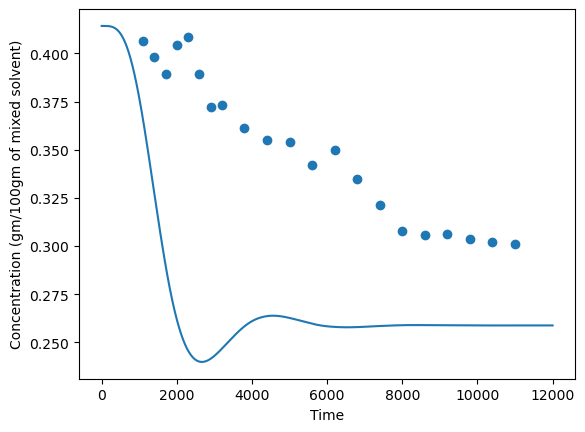

In [3]:
def generateODE2(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.4143                     # gm/(100 gm of mixed solvent)
    Ce = 0.1253                     # gm/(100 gm of mixed solvent)
    
    #calulate neccessary quantity
    A1= 0.001
    g1= 1.3674422124010206
    A2= 0.001
    g2= 0.8806401378356327
    kb= 0.009159735378591962
    b= 0.11727791169769848
    
    f = 2.5 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc
    

    return [dm00, dm10, dm01, dm11, dc]
t_span2 = (0, 12000)  # Adjust this to match the maximum time in your data
num_points2 = 12000
initialConditions2 = [0, 0, 0, 0, 0.4143]
sol2 = solve_ivp(
    lambda t, m: generateODE2(t, m),
    t_span2,
    initialConditions2,
    t_eval=np.linspace(t_span2[0], t_span2[1], num_points2))

Time2 = [1100,1400,1700,2000,2300,2600,2900,3200,3800,4400,5000,5600,6200,6800,7400,8000,8600,9200,9800,10400,11000]
Concentration2 = [0.4065976517, 0.398277282,0.3890997554,0.4042709267,0.4085997167,0.3893013659,0.3723033081,0.3730377399,0.361164624,0.3552221335,0.354109998,0.3422237102,0.3497295156,0.3346530385,0.3212697806,0.3079156156,0.3056669584,0.3060808548,0.3039224302,0.3023205142,0.3010328339]
plt.scatter(Time2, Concentration2)
plt.plot(sol2.t,sol2.y[4])
plt.xlabel("Time")
plt.ylabel("Concentration (gm/100gm of mixed solvent)")